# Preparation Notebook
Author: Michael Schwabe

In [1]:
import pandas as pd
path = "data/"

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv(path+"train.csv")
df_test = pd.read_csv(path+"test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Analysis for Preparation

In the exploration Task i identify some Feature their are very unusefull for prediction

Features with high cardinality and high distinction
* Name
* Cabin
* Ticket

Features with much missing values
* Cabin
* Ticket

unused Uniform Features
* Name
* PassengerID

interessting categrorical data
* SibSp (Childs)
* Parch (verwandte)
* Embarked (Zielhafen) - aber eigentlich auch egal!!!! Zu der Zeit könnte aber das Ziel mit der Klasse korellieren

ToDelete
* Name
* Cabin
* Ticket
* PassangerID


In [4]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S


In [5]:
del df_train["Cabin"]
del df_train["Name"]
del df_train["Ticket"]

In [6]:
df_train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,male,NaN,2,0,27.14,S


In [7]:
df_train.to_csv(path+"train_preprocess_lite.csv")

In [8]:
df_train = pd.read_csv(path+"train_preprocess_lite.csv")
del df_train["Unnamed: 0"]

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


!!! Achtung der Teufel liegt im Detail ... auffüllenn von Embarked ist nur eine Vermutung !!!

In [10]:
values = {'Age': 38, 'Fare': 43.92, 'Embarked':'S'}
df_train.fillna(value=values, inplace=True)

In [11]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,male,38.00,2,0,27.14,S
1,1,0,3,male,38.00,0,0,13.35,S
2,2,0,3,male,0.33,1,2,71.29,S
3,3,0,3,male,19.00,0,0,13.04,S
4,4,1,3,male,25.00,0,0,7.76,S
...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,female,62.00,0,0,14.86,C
99996,99996,0,2,male,66.00,0,0,11.15,S
99997,99997,0,3,male,37.00,0,0,9.95,S
99998,99998,0,3,male,51.00,0,1,30.92,S


In [12]:
df_train.to_csv(path+"train_preprocess_fillnan.csv")

In [7]:
df_train = pd.read_csv(path+"train_preprocess_fillnan.csv")
del df_train["Unnamed: 0"]

# OnehotEncoding, LabelEcoder or OrdinalMasking

Three Ways and fucking Two sides of the Medal ... 

**class sklearn.preprocessing.OrdinalEncoder(*, categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None)**
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder

**class sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')**
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

**class sklearn.preprocessing.LabelEncoder**
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder

**class sklearn.preprocessing.LabelBinarizer(*, neg_label=0, pos_label=1, sparse_output=False)**
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer

In [20]:
def preprocess_the_dataframes(df_train):
    del df_train['PassengerId']
    encoder_sex = LabelBinarizer()
    encoder_sex.fit(df_train['Sex'])
    
    transformed_sex = encoder_sex.transform(df_train['Sex'])
    ohe_df = pd.DataFrame(transformed_sex)
    df_train['Sex'] = ohe_df
    
    ohe_df = pd.get_dummies(df_train.Embarked, prefix='Embarked')
    df_train = pd.concat([df_train, ohe_df], axis=1).drop(['Embarked'], axis=1)
    
    ohe_df = pd.get_dummies(df_train.SibSp, prefix='SibSp')
    df_train = pd.concat([df_train, ohe_df], axis=1).drop(['SibSp'], axis=1)
    
    ohe_df = pd.get_dummies(df_train.Pclass, prefix='Pclass')
    df_train = pd.concat([df_train, ohe_df], axis=1).drop(['Pclass'], axis=1)
    
    ohe_df = pd.get_dummies(df_train.Parch, prefix='Parch')
    df_train = pd.concat([df_train, ohe_df], axis=1).drop(['Parch'], axis=1)
    
    #print(ohe_df.tail())
    return df_train

In [21]:
df_train = preprocess_the_dataframes(df_train)

In [22]:
df_train

,Survived,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,1,1,38.00,27.14,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,1,38.00,13.35,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0,1,0.33,71.29,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,19.00,13.04,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1,1,25.00,7.76,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,62.00,14.86,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
99996,0,1,66.00,11.15,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
99997,0,1,37.00,9.95,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
99998,0,1,51.00,30.92,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [23]:
df_train.to_csv(path+"train_preprocess_binarized_hotEncoded_full.csv")

In [4]:
df_train = pd.read_csv(path+"train_preprocess_binarized_hotEncoded_full.csv")
del df_train["Unnamed: 0"]

### OneHot encoding ?? pClass, SibSp and Parch

In [5]:
df_train.head(5)

,Survived,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,1,1,38.00,27.14,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,1,38.00,13.35,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0,1,0.33,71.29,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,19.00,13.04,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1,1,25.00,7.76,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0


# Split the train data to train and test 


Test some new Framework
* https://pypi.org/project/balanced-splits/

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold

In [7]:
X = pd.DataFrame(df_train)
y = df_train.Survived
del X["Survived"]

In [8]:
X.head(2)

,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,1,38.0,27.14,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,38.0,13.35,0,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [9]:
y.head(2)

0    1
1    0
Name: Survived, dtype: int64

In [10]:
#sss = StratifiedShuffleSplit(n_splits=2, test_size=0.25, random_state=42,train_size=0.75)
#sss.get_n_splits(X, y)

In [11]:
#print(sss)
#StratifiedShuffleSplit(n_splits=2, random_state=42, ...)



In [12]:
#for train_index, test_index in sss.split(X, y):
#    #print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

class sklearn.ensemble.RandomForestClassifier(
n_estimators=100, *, 
criterion='gini', 
max_depth=None, 
min_samples_split=2, 
min_samples_leaf=1, 
min_weight_fraction_leaf=0.0, 
max_features='auto', 
max_leaf_nodes=None, 
min_impurity_decrease=0.0, 
min_impurity_split=None, 
bootstrap=True, 
oob_score=False, 
n_jobs=None, 
random_state=None, 
verbose=0, 
warm_start=False, 
class_weight=None, 
ccp_alpha=0.0, 
max_samples=None)

In [14]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=25, random_state=42,n_jobs=6,verbose=1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:   19.4s finished


RandomForestClassifier(max_depth=25, n_estimators=1000, n_jobs=6,
                       random_state=42, verbose=1)

# Testing/Validation

In [15]:
y_pred = clf.predict(X_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.5s finished


In [16]:
#X_test['target'] = y_test
#X_test['pred'] = y_pred

In [17]:
#X_test

In [18]:
import joblib
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

In [19]:
sns.set(style="ticks", context="talk", rc={'figure.figsize':(10.0,8.00)})
plt.style.use("dark_background")
sns.set_context("talk")
#colormap = sns.color_palette("rocket_r", as_cmap=True)
#colormap = sns.color_palette("YlOrBr", as_cmap=True)
#colormap = sns.color_palette("vlag", as_cmap=True)
colormap = sns.color_palette("light:b", as_cmap=True)
#colormap = sns.color_palette("magma", as_cmap=True)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.6s finished


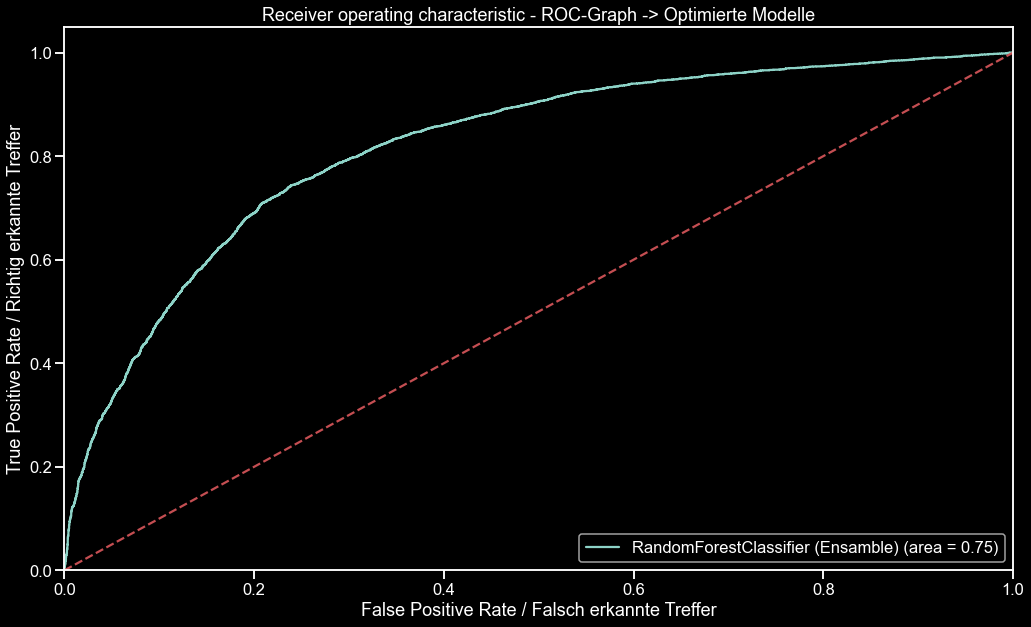

In [20]:
rf_roc_auc_array = []
fpr_array = []
tpr_array = []
thresholds_array = []

my_models = [clf]
my_models_name = ['RandomForestClassifier (Ensamble)']

plt.figure(figsize=(17,10))
for i in range(len(my_models)):
    rf_roc_auc_array.append(roc_auc_score(y_test, my_models[i].predict(X_test)))
    fpr, tpr, thresholds = roc_curve(y_test, my_models[i].predict_proba(X_test)[:,1])
    fpr_array.append(fpr)
    tpr_array.append(tpr)
    thresholds_array.append(thresholds)
    plt.plot(fpr, tpr, label=my_models_name[i]+' (area = %0.2f)' % rf_roc_auc_array[i])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / Falsch erkannte Treffer')
plt.ylabel('True Positive Rate / Richtig erkannte Treffer')
plt.title('Receiver operating characteristic - ROC-Graph -> Optimierte Modelle')
plt.legend(loc="lower right")
plt.savefig('plots/RF_ROC_opti3.png')
plt.show()

# HyperparameterTuning

In [21]:
from tuningscript import StructuredClassifierTuning

In [22]:
classifier = StructuredClassifierTuning()

#### MethodesToUse

class.StructuredClassifierTuning()

* best_opti_fitted_model(model_list, models_name_list, param_dict_list, x, y, xtest, ytest, verbose=0, pre_dispatch=None, n_jobs=None, folds=2, iter_search=5)
    * return pd.DataFrame(data=d), [bestIndex, bestmodel, bestACC, bestPre, bestF1], model_list
* get_my_models_list()
    * return a list
* get_my_models_name_list()
    * return a list
* get_parameter_distribution_list(cores = 2 --> Default)
    * return a list
* plot_roccurve(my_models,X_test,y_test)
    * void
* save_best_models(my_models)
    * void  
    

In [24]:
models = classifier.get_my_models_list()
models_name = classifier.get_my_models_name_list()
param_dist = classifier.get_parameter_distribution_list()#cores = 4)

In [ ]:
scored_model_df, models, model_list = classifier.best_opti_fitted_model(models, models_name, param_dist, X_train, y_train, X_test, y_test, verbose=1, pre_dispatch=2, n_jobs=1, folds=3, iter_search=100)

Fitting 3 folds for each of 100 candidates, totalling 300 fits

######### RandomForestClassifier (Ensamble) #########
RandomizedSearchCV took 2515.42 seconds for 100 candidates parameter settings.
Model with rank: 1 Mean validation score: 0.771 (std: 0.002)
Model with rank: 2 Mean validation score: 0.770 (std: 0.001)
Model with rank: 3 Mean validation score: 0.767 (std: 0.002)
Model with rank: 4 Mean validation score: 0.765 (std: 0.002)
Model with rank: 5 Mean validation score: 0.761 (std: 0.004)
0.7711
########  Treffer -> Save -> RandomForestClassifier (Ensamble) ########
Fitting 3 folds for each of 56 candidates, totalling 168 fits


In [ ]:
scored_model_df

In [ ]:
models

In [ ]:
model_list

In [ ]:
classifier.plot_roccurve(model_list, models_name,X_test,y_test)

In [52]:
def plot_roccurve(my_models,my_models_name, X_test, y_test):
        rf_roc_auc_array = []
        fpr_array = []
        tpr_array = []
        thresholds_array = []
        
        plt.figure(figsize=(17,10))
        for i in range(len(my_models)):
            rf_roc_auc_array.append(roc_auc_score(y_test, my_models[i].predict(X_test)))
            fpr, tpr, thresholds = roc_curve(y_test, my_models[i].predict_proba(X_test)[:,1])
            fpr_array.append(fpr)
            tpr_array.append(tpr)
            thresholds_array.append(thresholds)
            plt.plot(fpr, tpr, label=my_models_name[i]+' (area = %0.2f)' % rf_roc_auc_array[i])

        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate / Falsch erkannte Treffer')
        plt.ylabel('True Positive Rate / Richtig erkannte Treffer')
        plt.title('Receiver operating characteristic - ROC-Graph -> Optimierte Modelle')
        plt.legend(loc="lower right")
        plt.savefig('plots/RF_ROC_opti3.png')
        plt.show()

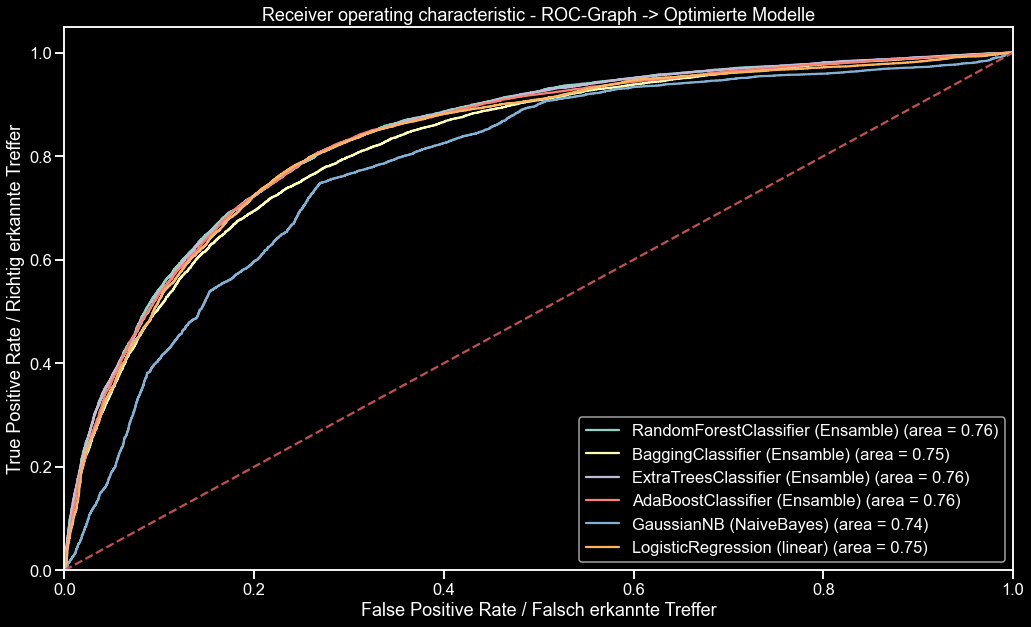

In [53]:
plot_roccurve(model_list,models_name,X_test,y_test)

In [56]:
def save_best_models(my_models,my_models_name):
        for i in range(len(my_models)):
            print('SAVE MODEL ' + str(my_models_name[i]) + ' .. ')
            joblib.dump(my_models[i], str(my_models_name[i]) + "_HP_opti.joblib")
            print('SAVE COMPLETE !')

In [57]:
save_best_models(model_list,models_name)

SAVE MODEL RandomForestClassifier (Ensamble) .. 
SAVE COMPLETE !
SAVE MODEL BaggingClassifier (Ensamble) .. 
SAVE COMPLETE !
SAVE MODEL ExtraTreesClassifier (Ensamble) .. 
SAVE COMPLETE !
SAVE MODEL AdaBoostClassifier (Ensamble) .. 
SAVE COMPLETE !
SAVE MODEL GaussianNB (NaiveBayes) .. 
SAVE COMPLETE !
SAVE MODEL LogisticRegression (linear) .. 
SAVE COMPLETE !


# Predict the TestDataSet

In [ ]:
def preprocess_the_dataframes_test(dataframe):
    del dataframe['Name']
    del dataframe['Cabin']
    del dataframe['Ticket']
    #30.56579642 MeanAge .. Fare 45.37480439
    values = {'Age': 31, 'Fare': 45.37, 'Embarked':'S'}
    dataframe.fillna(value=values, inplace=True)
    return dataframe

In [ ]:
df_test = preprocess_the_dataframes(preprocess_the_dataframes_test(pd.read_csv(path+"test.csv")))

In [ ]:
df_test

In [ ]:
y_pred = clf.predict(df_test)

In [ ]:
y_pred